# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import pytemperature
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [3]:
citiesDF = pd.DataFrame(cities)
citiesDF['Cloudiness']= ''
citiesDF['Country']= ''
citiesDF['Date']= ''
citiesDF['Humidity']= ''
citiesDF['Lat']= ''
citiesDF['Lng']= ''
citiesDF['Max_Temp']= ''
citiesDF['Wind_Speed']= ''
citiesDF['City']= cities
citiesDF=citiesDF.drop(columns=[0])
citiesDF.columns
citiesDF = citiesDF[['City','Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max_Temp',
       'Wind_Speed']]
citiesDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,vaini,,,,,,,,
1,esperance,,,,,,,,
2,kiyasovo,,,,,,,,
3,hermanus,,,,,,,,
4,caravelas,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url='https://api.openweathermap.org/data/2.5/weather?q='
tag_url='&appid='+api_key
response_json = []
for x in range(len(cities)):
    print(f"Making request number: {x} for ID: {cities[x]}")
#     post_response = requests.get(base_url + str(cities[x]) + tag_url)
    post = requests.get(base_url + str(cities[x]) + tag_url)
    response_json.append(post.json())

Making request number: 0 for ID: vaini
Making request number: 1 for ID: esperance
Making request number: 2 for ID: kiyasovo
Making request number: 3 for ID: hermanus
Making request number: 4 for ID: caravelas
Making request number: 5 for ID: mataura
Making request number: 6 for ID: korla
Making request number: 7 for ID: lincoln
Making request number: 8 for ID: manacor
Making request number: 9 for ID: hilo
Making request number: 10 for ID: port elizabeth
Making request number: 11 for ID: busselton
Making request number: 12 for ID: popondetta
Making request number: 13 for ID: yellowknife
Making request number: 14 for ID: provideniya
Making request number: 15 for ID: cape town
Making request number: 16 for ID: naze
Making request number: 17 for ID: rikitea
Making request number: 18 for ID: beypur
Making request number: 19 for ID: maple creek
Making request number: 20 for ID: albany
Making request number: 21 for ID: ilulissat
Making request number: 22 for ID: hobart
Making request number: 

Making request number: 188 for ID: opotiki
Making request number: 189 for ID: lagoa da canoa
Making request number: 190 for ID: severomuysk
Making request number: 191 for ID: upernavik
Making request number: 192 for ID: paamiut
Making request number: 193 for ID: chimbote
Making request number: 194 for ID: tual
Making request number: 195 for ID: karasjok
Making request number: 196 for ID: baykit
Making request number: 197 for ID: macklin
Making request number: 198 for ID: gushikawa
Making request number: 199 for ID: nouakchott
Making request number: 200 for ID: taltal
Making request number: 201 for ID: avarua
Making request number: 202 for ID: villarrica
Making request number: 203 for ID: marcona
Making request number: 204 for ID: sonoita
Making request number: 205 for ID: bambous virieux
Making request number: 206 for ID: mazatlan
Making request number: 207 for ID: polson
Making request number: 208 for ID: dzhusaly
Making request number: 209 for ID: pisco
Making request number: 210 for

Making request number: 374 for ID: pahalgam
Making request number: 375 for ID: sabha
Making request number: 376 for ID: usevya
Making request number: 377 for ID: yongan
Making request number: 378 for ID: thompson
Making request number: 379 for ID: conceicao do araguaia
Making request number: 380 for ID: flin flon
Making request number: 381 for ID: yopal
Making request number: 382 for ID: tecpan
Making request number: 383 for ID: sao filipe
Making request number: 384 for ID: san patricio
Making request number: 385 for ID: erdenet
Making request number: 386 for ID: diamantino
Making request number: 387 for ID: tunduru
Making request number: 388 for ID: kapuskasing
Making request number: 389 for ID: avera
Making request number: 390 for ID: gambo
Making request number: 391 for ID: viedma
Making request number: 392 for ID: tokmak
Making request number: 393 for ID: luganville
Making request number: 394 for ID: severnyy
Making request number: 395 for ID: ahuimanu
Making request number: 396 fo

Making request number: 559 for ID: richards bay
Making request number: 560 for ID: sharan
Making request number: 561 for ID: roald
Making request number: 562 for ID: znamenskoye
Making request number: 563 for ID: podborany
Making request number: 564 for ID: black river
Making request number: 565 for ID: carlsbad
Making request number: 566 for ID: uyuni
Making request number: 567 for ID: yershov
Making request number: 568 for ID: tessalit
Making request number: 569 for ID: amazar
Making request number: 570 for ID: gravelbourg
Making request number: 571 for ID: tukrah
Making request number: 572 for ID: makakilo city
Making request number: 573 for ID: camacha
Making request number: 574 for ID: batagay
Making request number: 575 for ID: solnechnyy
Making request number: 576 for ID: novoilinsk
Making request number: 577 for ID: nyaunglebin
Making request number: 578 for ID: camana
Making request number: 579 for ID: saint-joseph
Making request number: 580 for ID: alice springs
Making request

In [19]:
ts= int("1563593988")
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))

2019-07-20


In [8]:
Humiditylist=[]
Cloudinesslist=[]
Countrylist=[]
Datelist=[]
Humiditylist=[]
Latlist=[]
Lnglist=[]
Max_Templist=[]
Wind_Speedlist=[]
x=0

In [9]:
for i in response_json:
    try:
        Cloudinesslist.append(int(response_json[x]['clouds']['all']))
        Countrylist.append(str(response_json[x]['sys']['country']))
        Datelist.append(int(response_json[x]['dt']))
        Humiditylist.append(int(response_json[x]['main']['humidity']))
        Latlist.append(int(response_json[x]['coord']['lat']))
        Lnglist.append(int(response_json[x]['coord']['lon']))
        Max_Templist.append(int(response_json[x]['main']['temp_max']))
        Wind_Speedlist.append(int(response_json[x]['wind']['speed']))
        x= x+1
    except:
        Humiditylist.append('null')
        Cloudinesslist.append('null')
        Countrylist.append('null')
        Datelist.append('null')
        Latlist.append('null')
        Lnglist.append('null')
        Max_Templist.append('null')
        Wind_Speedlist.append('null')
        x=x+1
        continue
len(Humiditylist)

590

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
citiesDF['Cloudiness']= Cloudinesslist
citiesDF['Country']= Countrylist
citiesDF['Date']= Datelist
citiesDF['Humidity']= Humiditylist
citiesDF['Lat']= Latlist
citiesDF['Lng']= Lnglist
citiesDF['Max_Temp']= Max_Templist
citiesDF['Wind_Speed']= Wind_Speedlist
citiesDF2=citiesDF[citiesDF.Cloudiness != 'null']
New_Max_Templist=citiesDF2['Max_Temp'].tolist()

In [11]:
Max_TemplistF= []
for x in New_Max_Templist:
    Max_TemplistF.append(pytemperature.k2f(x))
citiesDF2['Max_Temp']= Max_TemplistF
citiesDF2

C:\Users\todda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,vaini,75,IN,1563594083,88,15,74,73.11,2
1,esperance,75,AU,1563594084,76,-33,121,53.31,10
2,kiyasovo,0,RU,1563594084,97,56,53,62.31,2
3,hermanus,2,ZA,1563594084,80,-34,19,46.11,1
4,caravelas,0,BR,1563594085,72,-17,-39,69.51,5
5,mataura,100,NZ,1563594085,97,-46,168,47.91,3
7,lincoln,100,GB,1563593987,93,53,0,62.31,6
8,manacor,0,ES,1563594086,100,39,3,74.91,2
9,hilo,1,US,1563593988,65,19,-155,82.11,4
10,port elizabeth,1,US,1563594087,83,39,-74,85.71,2


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [32]:
ts= int(citiesDF2['Date'][0])
daterun=datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
daterun

'07/20/19'

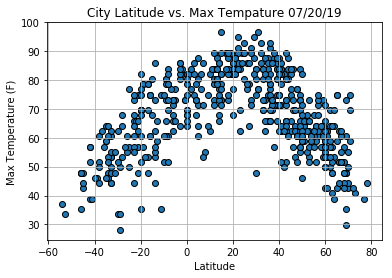

In [34]:
ts= int(citiesDF2['Date'][0])
daterun=datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
plt.scatter(citiesDF2.Lat, citiesDF2.Max_Temp, edgecolors='black')
plt.title("City Latitude vs. Max Tempature "+ daterun)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Lat_vs_Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

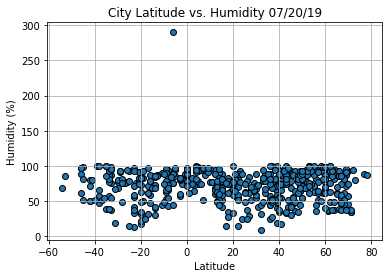

In [35]:
plt.scatter(citiesDF2.Lat, citiesDF2.Humidity, edgecolors='black')
plt.title("City Latitude vs. Humidity "+ daterun)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

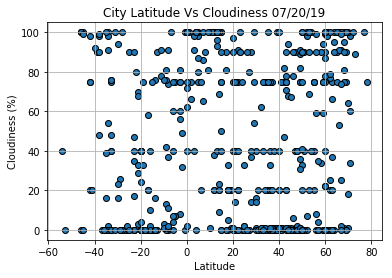

In [37]:
plt.scatter(citiesDF2.Lat, citiesDF2.Cloudiness, edgecolors='black')
plt.title("City Latitude Vs Cloudiness "+ daterun)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

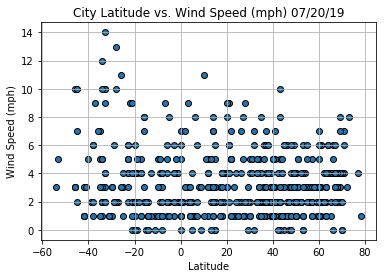

In [36]:
plt.scatter(citiesDF2.Lat, citiesDF2.Wind_Speed, edgecolors='black')
plt.title("City Latitude vs. Wind Speed (mph) "+ daterun)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_vs_Wind_Speed.png")
plt.show()